# Dataset object

In [1]:
import numpy as np
from qube import Dataset, Axis

In [2]:
ds1 = Dataset(
    name='qpc',
    unit='nA',
    value=np.arange(10).reshape(5,2),
    axes=[], # optional
)
ds1

name: qpc - unit: nA - shape: (5, 2)
axes: 2 elements
	[0] name: counter_dim0 - unit: a.u. - shape: (5,) - dim: 0
	[1] name: counter_dim1 - unit: a.u. - shape: (2,) - dim: 1

In [3]:
## Access to each information
print(f'{ds1.name=}')
print(f'{ds1.unit=}')
print(f'{ds1.label=}')
print(f'{ds1.value=}')
print(f'{ds1.axes=}')

ds1.name='qpc'
ds1.unit='nA'
ds1.label='qpc (nA)'
ds1.value=array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])
ds1.axes=[Axis - name: counter_dim0 - unit: a.u. - shape: (5,) - dim: 0, Axis - name: counter_dim1 - unit: a.u. - shape: (2,) - dim: 1]


## Add axis to dataset

In [4]:
ax1 = Axis(
    name='G1',
    unit='V',
    value=np.linspace(-1,1,5), # 5 points for first index
    dim=0, # sweeping dimension index
)
ds1.add_axis(ax1)
ds1

name: qpc - unit: nA - shape: (5, 2)
axes: 3 elements
	[0] name: G1 - unit: V - shape: (5,) - dim: 0
	[1] name: counter_dim0 - unit: a.u. - shape: (5,) - dim: 0
	[2] name: counter_dim1 - unit: a.u. - shape: (2,) - dim: 1

In [5]:
ax2 = Axis(
    name='G_incompatible',
    unit='V',
    value=np.arange(7), # note that this does not match with ds1.shape (5,2)
    dim=0,
)
ds1.add_axis(ax2) # it will ignore it because it is not a valid axis for this dataset
ds1

name: qpc - unit: nA - shape: (5, 2)
axes: 3 elements
	[0] name: G1 - unit: V - shape: (5,) - dim: 0
	[1] name: counter_dim0 - unit: a.u. - shape: (5,) - dim: 0
	[2] name: counter_dim1 - unit: a.u. - shape: (2,) - dim: 1

# Use plotter
You need the following packages:
- ipywidgets: conda install ipywidgets (https://ipywidgets.readthedocs.io/en/latest/user_install.html)
- ipympl: conda install ipympl (https://github.com/matplotlib/ipympl)

In [6]:
from qube.postprocess.figures import Plot1D, Plot2D
import matplotlib.pyplot as plt
%matplotlib notebook

In [7]:
# define some saving options
save_options = {
    'folder': '',
    'extension': 'png',
    'kwargs': {'dpi': 100, 'bbox_inches': 'tight'},
}

# Create a new sinus dataset with its axis
ax2 = Axis(
    name='x',
    value=np.linspace(-10, 10, 1001),
    dim=0)

ds2 = Dataset(
    name='sinus',
    value=np.sin(2*np.pi*ax2.value),
    axes=[ax2],
)
ds2

name: sinus - unit: a.u. - shape: (1001,)
axes: 2 elements
	[0] name: x - unit: a.u. - shape: (1001,) - dim: 0
	[1] name: counter_dim0 - unit: a.u. - shape: (1001,) - dim: 0

<IPython.core.display.Javascript object>


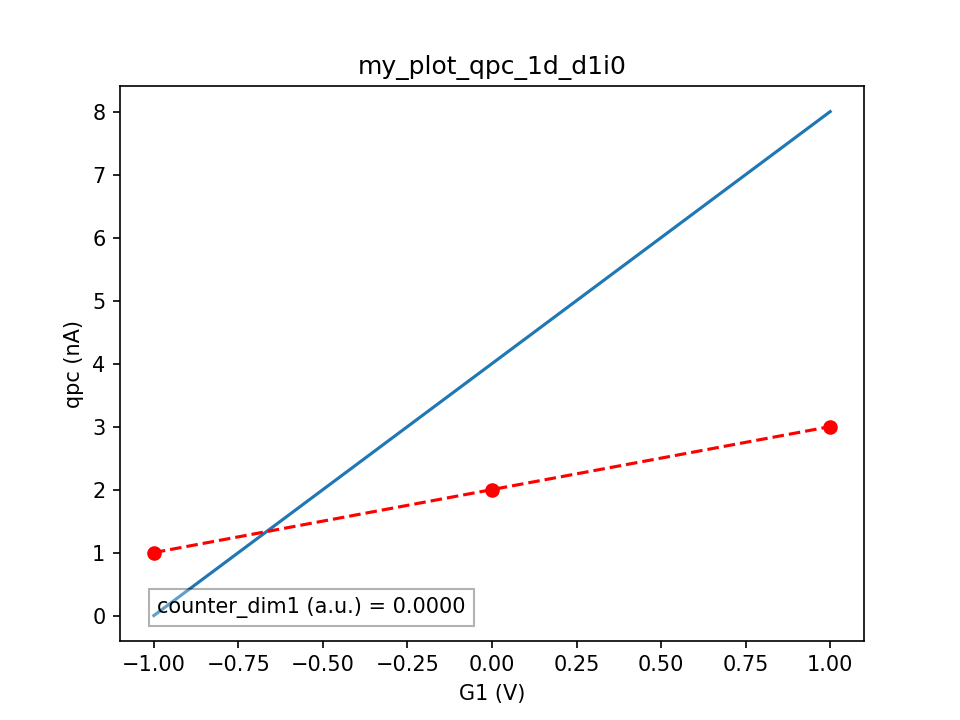

In [8]:
p1 = Plot1D([ds1,ds2], save_options=save_options, title_prefix='my_plot')

In [9]:
# you can dynamically change the figure/axis by accessing to p1.ax or p1.fig
p1.ax.plot([-1,0,1],[1,2,3],'ro--')

# Datafile: collection of datasets

In [10]:
from qube import Datafile, load_datafile
import os

df = Datafile()
df.add_dataset(ds1)
df.add_dataset(ds2)
df

Datafile
fullpath: None
datasets: 2 elements
[0] name: qpc - unit: nA - shape: (5, 2)
	axes: 3 elements
	[0] name: G1 - unit: V - shape: (5,) - dim: 0
	[1] name: counter_dim0 - unit: a.u. - shape: (5,) - dim: 0
	[2] name: counter_dim1 - unit: a.u. - shape: (2,) - dim: 1
[1] name: sinus - unit: a.u. - shape: (1001,)
	axes: 2 elements
	[0] name: x - unit: a.u. - shape: (1001,) - dim: 0
	[1] name: counter_dim0 - unit: a.u. - shape: (1001,) - dim: 0

In [11]:
# You can save it
df.save(
    fullpath=os.path.join(os.getcwd(),'test_df.json'), #save as .json or .npz, it will generate 2 files
    overwrite=True, # if false, it will add and index: file_0.json, file_1.json, etc...
    ) 

In [12]:
# You can load it
df2 = load_datafile(os.path.join(os.getcwd(),'test_df.json'))
df2

Datafile
fullpath: D:\OneDrive\Jobs\PhD\Scripts\repositories\qube\examples\test_df.json
datasets: 2 elements
[0] name: qpc - unit: nA - shape: (5, 2)
	axes: 3 elements
	[0] name: G1 - unit: V - shape: (5,) - dim: 0
	[1] name: counter_dim0 - unit: a.u. - shape: (5,) - dim: 0
	[2] name: counter_dim1 - unit: a.u. - shape: (2,) - dim: 1
[1] name: sinus - unit: a.u. - shape: (1001,)
	axes: 2 elements
	[0] name: x - unit: a.u. - shape: (1001,) - dim: 0
	[1] name: counter_dim0 - unit: a.u. - shape: (1001,) - dim: 0

## Some relevant attributes / features

In [13]:
print(df2.fullpath)
print(df2.filename)
print(df2.folder)
print(df2.ds_names)
ds1 = df2['qpc']
ds2 = df2['sinus']
ds3 = df2.get_dataset('qpc')
list_ds = df2.get_datasets_by_name('sin',exact_match=False) # always return a list
ds4 = list_ds[0] # the first match

D:\OneDrive\Jobs\PhD\Scripts\repositories\qube\examples\test_df.json
test_df
D:\OneDrive\Jobs\PhD\Scripts\repositories\qube\examples
['qpc', 'sinus']


In [15]:
# other useful methods
# df.clear_datasets()
# df.remove_dataset
# df.remove_datasets_by_name